In [15]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib seaborn

# Upload the dataset (you will be prompted to upload your CSV)
from google.colab import files
uploaded = files.upload()


Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time (1).csv


In [16]:
import pandas as pd

# Load CSV
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Preview the data
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Split features and label
X = df.drop(columns=["Exceeded_Recommended_Limit"])
y = df["Exceeded_Recommended_Limit"]

# Define column types
categorical_cols = ["Gender", "Primary_Device", "Health_Impacts", "Urban_or_Rural"]
numerical_cols = ["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]

# Create a preprocessing transformer
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

# Combine preprocessing and classifier into a pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Primary_Device',
                                                   'Health_Impacts',
                                                   'Urban_or_Rural'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [18]:
# Print model accuracy
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 100.00%


/tmp/ipython-input-19-1867050983.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="mako")


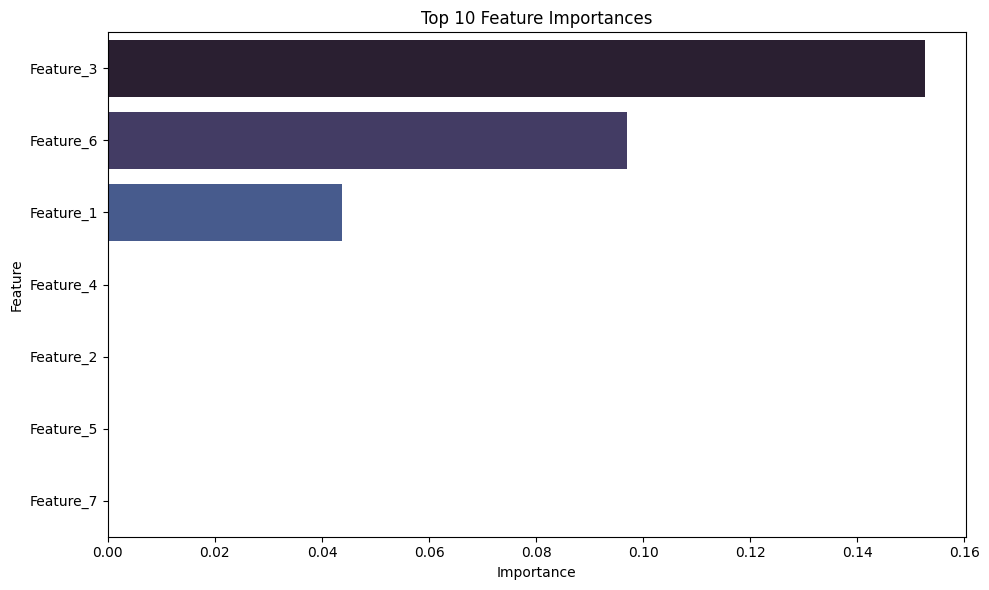

In [19]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Compute permutation importance
results = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

# Use generic feature names
n_features = results.importances_mean.shape[0]
feature_names = [f"Feature_{i+1}" for i in range(n_features)]

# Plot
importances = pd.Series(results.importances_mean, index=feature_names)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="mako")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [20]:
import joblib

# Save the model to file
joblib.dump(pipeline, "screen_time_model.joblib")

# Download the model
from google.colab import files
files.download("screen_time_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>